In [1]:
import sklearn
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata
import re
import importlib.util
#spec = importlib.util.spec_from_file_location("ScanpyUtilsMT", os.path.expanduser("~/code/pollye/MTsc/utils/ScanpyUtilsMT.py"))
#sc_utils = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(sc_utils)

In [2]:
#Assess cluster enrichment
df=pd.read_csv('/home/mt/Downloads/figs/False/E65-2019A_AND_E65-2019B_MULTI-SEQ_1/leidenOriginalMarkerSumStats.csv')
df.index=df.iloc[:,0]
#print(df.loc[:,df.iloc[0,:]=='mean'].iloc[2:,:-4])
statmat=df.loc[:,df.iloc[0,:]=='mean'].iloc[2:,:-4]
statmat=statmat.loc[:,['lda' not in x for x in statmat.columns]]
statmat=statmat.loc[:,['counts' not in x for x in statmat.columns]]
maxval=statmat.max(axis=1)#-statmat.median(axis=1)
celltype=[re.sub('.1','',x) for x in  statmat.astype('float').idxmax(axis=1)]
ambtab=pd.DataFrame(list(maxval),index=celltype)
ambtab

FileNotFoundError: [Errno 2] File b'/home/mt/Downloads/figs/False/E65-2019A_AND_E65-2019B_MULTI-SEQ_1/leidenOriginalMarkerSumStats.csv' does not exist: b'/home/mt/Downloads/figs/False/E65-2019A_AND_E65-2019B_MULTI-SEQ_1/leidenOriginalMarkerSumStats.csv'

In [3]:
diffvals=[]
for c in set(origtab.index) & set(ambtab.index):
    #print(c)
    #print(origtab.loc[c,0].mean()-ambtab.loc[c,0].mean())
    diffvals.append(origtab.loc[c,0].mean()-ambtab.loc[c,0].mean())
sns.distplot(diffvals)
plt.show()
np.mean(diffvals)

NameError: name 'origtab' is not defined

            LGE-derived Neuron.1     Endothelial Cell.1         Radial Glia.1  \
Unnamed: 0                                                                      
0            -0.3082874119281769   -0.06250037252902985  -0.07030908018350601   
1            -0.3766948878765106   -0.12957385182380676    0.6169601082801819   
2             0.6082863211631775    -0.1794675886631012   -0.3320872485637665   
3            -0.0827166959643364   0.013121575117111206   -0.2464182823896408   
4           -0.41393306851387024   -0.14386744797229767   0.31975671648979187   
5             0.6806941628456116    -0.0854424387216568  -0.12661316990852356   
6            -0.3568526804447174     0.0734204649925232  -0.08449804782867432   
7            0.23177525401115417    -0.1502913534641266   -0.3696827292442322   
8            -0.1289154291152954  -0.040702905505895615   0.31920328736305237   
9            0.04714156687259674    0.09401196241378784  -0.03827488794922829   
10          -0.2887531220912

                 Layer 6 Neuron.1               Neuron.1  \
Unnamed: 0                                                 
0            -0.13691210746765137   -0.01913672871887684   
1              0.4054577350616455    0.03182478994131088   
2            -0.21171842515468597  -0.056404948234558105   
3           -0.048279836773872375  -0.029689045622944832   
4             0.02816682867705822   -0.09141860157251358   
5            0.050741154700517654    0.03154454007744789   
6            -0.11476437747478485   -0.11303012818098068   
7            -0.05984236299991608    0.46005871891975403   
8             -0.1208949014544487   0.015389048494398594   
9             0.09683095663785934   -0.10860798507928848   
10             0.2706804871559143   -0.06466865539550781   
11             -0.151381254196167    0.04001745954155922   
12            -0.1829361617565155   0.029834629967808723   
13           -0.12497850507497787   -0.04146723821759224   
14          -0.006580602843314409     0.

            LGE-derived Neuron.1    Endothelial Cell.1         Radial Glia.1  \
Unnamed: 0                                                                     
0            0.05502456799149513   -0.1779875010251999    0.4699917733669281   
1           -0.02476508729159832  -0.14614523947238922   0.08369528502225876   
2            -0.1733209639787674   -0.1303047090768814   -0.2122516930103302   
3           -0.21239282190799713  -0.10418631881475449  -0.03942110389471054   
4            0.13081222772598267   -0.1913091242313385    0.3402504622936249   
5           -0.09201819449663162  0.023334940895438194  -0.07597437500953674   
6           0.052524056285619736  -0.16754058003425598   -0.1889730840921402   
7            -0.0561998225748539    -0.075452521443367   0.25745055079460144   
8            -0.0502626895904541  -0.23266617953777313  0.025987355038523674   
9            0.21904368698596954   0.12770678102970123   -0.3407280147075653   
10          -0.06765371561050415    1.14

ValueError: attempt to get argmax of an empty sequence

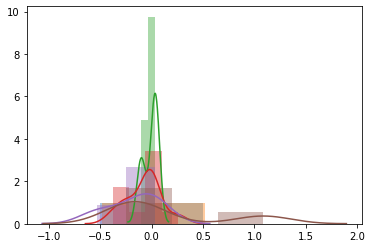

In [12]:
headpath='/home/mt/Downloads/figs/False/'
adatapaths=[os.path.join(headpath,x) for x in  os.listdir(headpath)]
samplenames=[re.sub('_Out','',x) for x in  os.listdir(headpath)]
samplesdone=[]
alldiffs=[]
for adatapath,samplename in zip(np.array(adatapaths)[::-1],np.array(samplenames)[::-1]):
    if not os.path.exists(os.path.join(adatapath,'leidenAmbiaintMarkerSumStats.csv')):
        continue
    samplesdone.append(samplename)
    df=pd.read_csv(os.path.join(adatapath,'leidenAmbiaintMarkerSumStats.csv'))
    df.index=df.iloc[:,0]
    #print(df.loc[:,df.iloc[0,:]=='mean'].iloc[2:,:-4])
    statmat=df.loc[:,df.iloc[0,:]=='mean'].iloc[2:,:-4]
    statmat=statmat.loc[:,['lda' not in x for x in statmat.columns]]
    statmat=statmat.loc[:,['counts' not in x for x in statmat.columns]]
    maxval=statmat.max(axis=1)#-statmat.median(axis=1)
    celltype=[re.sub('.1','',x) for x in  statmat.astype('float').idxmax(axis=1)]
    ambtab=pd.DataFrame(list(maxval),index=celltype)
    df=pd.read_csv(os.path.join(adatapath,'leidenOriginalMarkerSumStats.csv'))
    df.index=df.iloc[:,0]
    #print(df.loc[:,df.iloc[0,:]=='mean'].iloc[2:,:-4])
    statmat=df.loc[:,df.iloc[0,:]=='mean'].iloc[2:,:-4]
    statmat=statmat.loc[:,['lda' not in x for x in statmat.columns]]
    statmat=statmat.loc[:,['counts' not in x for x in statmat.columns]]
    maxval=statmat.max(axis=1)#-statmat.median(axis=1)
    print(statmat)
    celltype=[re.sub('.1','',x) for x in  statmat.astype('float').idxmax(axis=1)]
    origtab=pd.DataFrame(list(maxval),index=celltype)
    diffvals=[]
    for c in set(origtab.index) & set(ambtab.index):
        print(c)
        print('orig')
        print(origtab.loc[c,0])
        print('amb')
        print(ambtab.loc[c,0])
        print('diff',origtab.loc[c,0].max()-ambtab.loc[c,0].max())
        diffvals.append(origtab.loc[c,0].max()-ambtab.loc[c,0].max())
    alldiffs.append(np.mean(diffvals))
    sns.distplot(diffvals)
plt.show()

{'PEC_YALE_SINGLECELLRNASEQ_RMB691_STR': 0.002921462059020996, 'E80-2019_HYPOTHALAMUS': 0.01627963036298752, 'PEC_YALE_SINGLECELLRNASEQ_RMB691_MD': -0.010170479615529379, 'mergingHIP': -0.07076118641403313, 'PEC_YALE_SINGLECELLRNASEQ_RMB691_DFC': -0.17815151810646057, 'PEC_YALE_SINGLECELLRNASEQ_RMB691_HIP': 0.15305231511592865}


-0.0036245087782541914

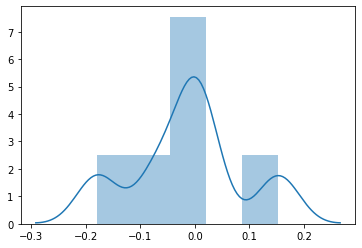

In [13]:
sns.distplot(alldiffs)
print(dict(zip(samplesdone,alldiffs)))
np.median(alldiffs)

E80-2019_CEREBELLUM
PEC_YALE_SINGLECELLRNASEQ_RMB691_STR


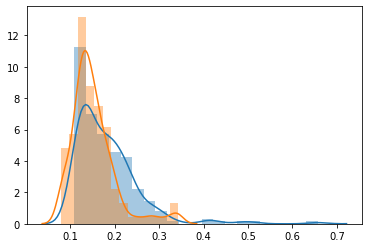

E65-2019A_CEREBELLUM_PONS


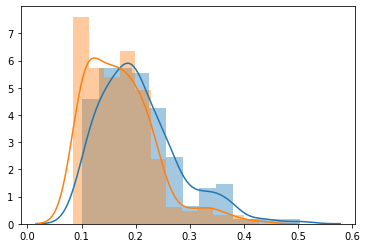

E80-2019_MIDBRAIN
E65-2019A_AND_E65-2019B_MULTI-SEQ_1
E65-2019B_HYPOTHALAMUS


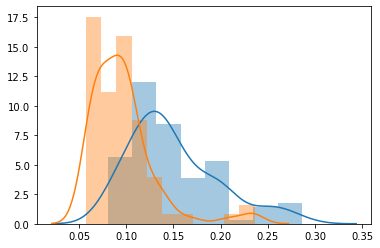

E90-2019_MOTOR_2


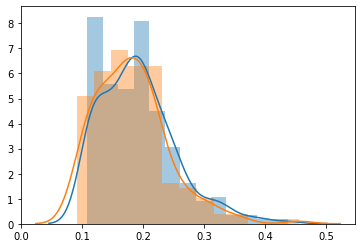

E65-2019A_TEMPORAL
PEC_YALE_SINGLECELLRNASEQ_RMB691_CBC
E65-2019A_SOMATOSENSORY


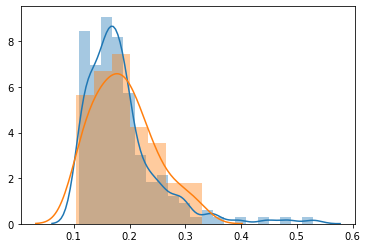

PEC_YALE_SINGLECELLRNASEQ_RMB691_AMY


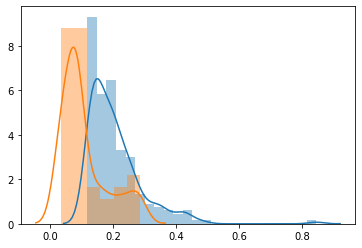

E65-2019A_MOTOR_2
E65-2019A_AND_E65-2019B_MULTI-SEQ_3
E80-2019_HIPPOCAMPUS
E80-2019_TEMPORAL


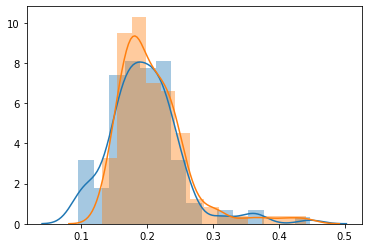

E80-2019_HYPOTHALAMUS
E65-2019B_MOTOR_1


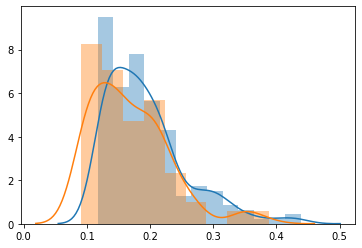

E65-2019A_PARIETAL
E80-2019_MOTOR_1
mergingMD
mergingAMY
PBMC_MMHG
E80-2019_SOMATOSENSORY
PEC_YALE_SINGLECELLRNASEQ_RMB691_MD


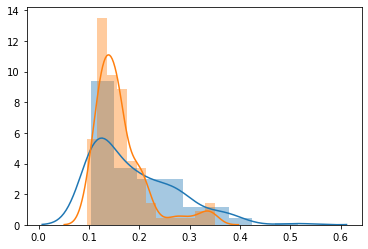

mergingCBC
E90-2019_PFC


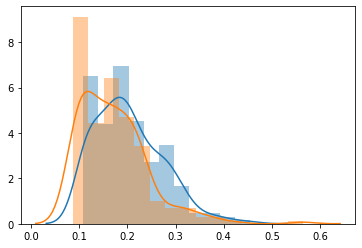

mergingHIP
E65-2019A_CGE_AND_LGE


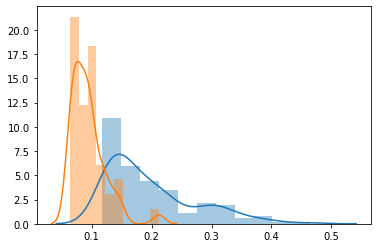

E80-2019_MGE
mergingDFC
PEC_YALE_SINGLECELLRNASEQ_RMB683_HIP


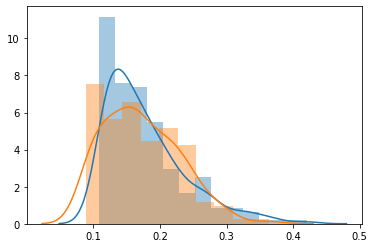

E90-2019_HIPPOCAMPUS_AND_CHOROID


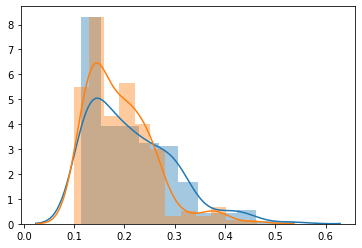

E80-2019_LGE_AND_CGE
E90-2019_V1


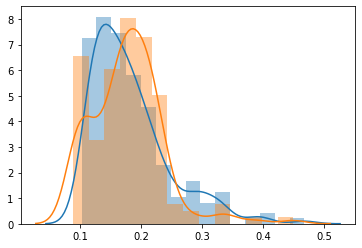

E65-2019A_THALAMUS
E65-2019A_HYPOTHALAMUS


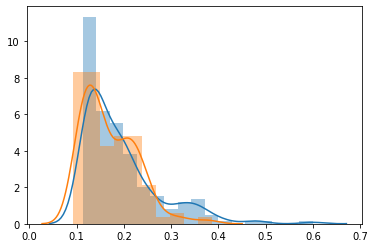

PEC_YALE_SINGLECELLRNASEQ_RMB691_DFC


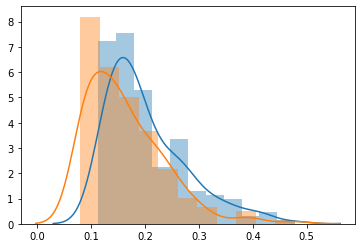

E90-2019_PUTAMEN_AND_SEPTUM


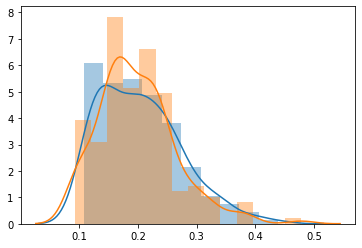

mergingSTR
PEC_YALE_SINGLECELLRNASEQ_RMB691_HIP


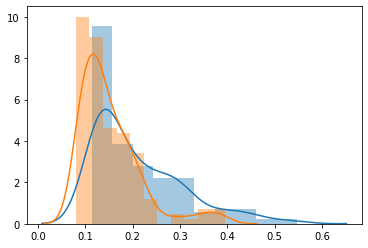

E65-2019A_MGE


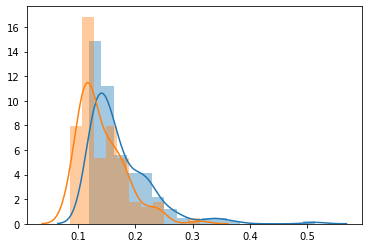

E80-2019_MOTOR_2
1k_hgmm


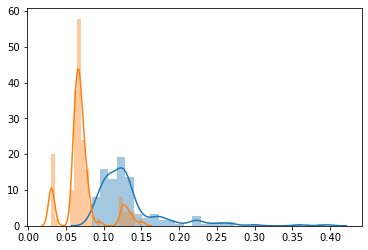

E65-2019B_THALAMUS


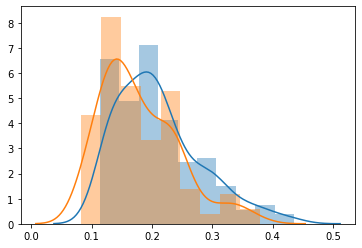

E80-2019_PONS
E65-2019B_SOMATOSENSORY


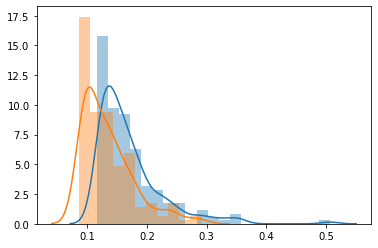

E90-2019_CEREBELLUM
E90-2019_MIDBRAIN
PEC_YALE_SINGLECELLRNASEQ_RMB683_CBC


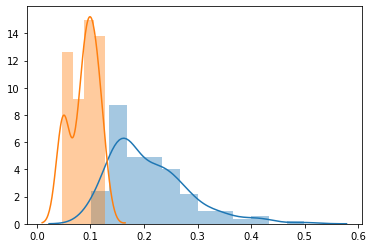

E80-2019_MULTI-SEQ
E65-2019B_PARIETAL


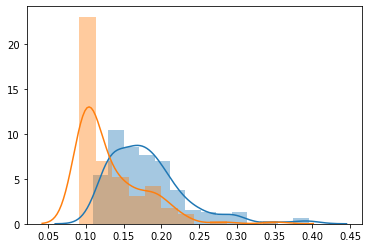

In [14]:
headpath='/home/mt/Downloads/figs/False'
adatapaths=[os.path.join(headpath,x) for x in  os.listdir(headpath)]
samplenames=[re.sub('_Out','',x) for x in  os.listdir(headpath)]
samplesdone=[]
alldiffs=[]
before=[]
after=[]
for adatapath,samplename in zip(np.array(adatapaths)[::-1],np.array(samplenames)[::-1]):
    print(samplename)
    if not os.path.exists(os.path.join(adatapath,samplename+'AfterleidenLogRegMarkers.csv')):
        continue
    samplesdone.append(samplename)
    dfb=pd.read_csv(os.path.join(adatapath,samplename+'BeforeleidenLogRegMarkers.csv'),index_col=0)
    dfa=pd.read_csv(os.path.join(adatapath,samplename+'AfterleidenLogRegMarkers.csv'),index_col=0)
    dfb=dfb.loc[:10,['_s' in x for x in dfb.columns]]
    dfa=dfa.loc[:10,['_s' in x for x in dfa.columns]]
    sns.distplot(np.array(dfb).flatten())
    sns.distplot(np.array(dfa).flatten())
    before.append(np.array(dfb).flatten())
    after.append(np.array(dfa).flatten())
    plt.show()


0.19117901522580644
0.1619526402600062


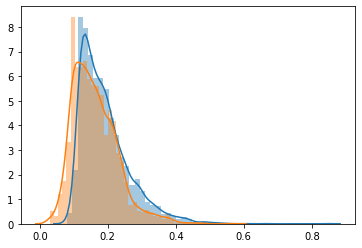

In [15]:
print(np.mean(np.mean([item for sublist in before for item in sublist])))
print(np.mean(np.mean([item for sublist in after for item in sublist])))

sns.distplot([item for sublist in before for item in sublist])
sns.distplot([item for sublist in after for item in sublist])


In [16]:
headpath='/home/mt/Downloads/figs/False'
adatapaths=[os.path.join(headpath,x) for x in  os.listdir(headpath)]
samplenames=[re.sub('_Out','',x) for x in  os.listdir(headpath)]
samplesdone=[]
alldiffs=[]
for adatapath,samplename in zip(np.array(adatapaths)[::-1],np.array(samplenames)[::-1]):
    if not os.path.exists(os.path.join(adatapath,'SpectralScores.csv')):
        continue
    samplesdone.append(samplename)
    df=pd.read_csv(os.path.join(adatapath,'SpectralScores.csv'))
    alldiffs.append(df)
    print(samplename)

PEC_YALE_SINGLECELLRNASEQ_RMB691_STR
E80-2019_HYPOTHALAMUS
PEC_YALE_SINGLECELLRNASEQ_RMB691_MD
mergingHIP
PEC_YALE_SINGLECELLRNASEQ_RMB691_DFC
PEC_YALE_SINGLECELLRNASEQ_RMB691_HIP
1k_hgmm


  Unnamed: 0         0 Unnamed: 0         0 Unnamed: 0         0 Unnamed: 0  \
0   Original -0.129462   Original -0.024015   Original -0.093664   Original   
1   Ambiaint -0.166503   Ambiaint -0.021624   Ambiaint -0.113835   Ambiaint   

          0 Unnamed: 0         0 Unnamed: 0         0 Unnamed: 0         0  
0 -0.157649   Original -0.168786   Original -0.145475   Original -0.022059  
1 -0.182034   Ambiaint -0.190291   Ambiaint -0.166996   Ambiaint -0.020598  
0.02150578796863556


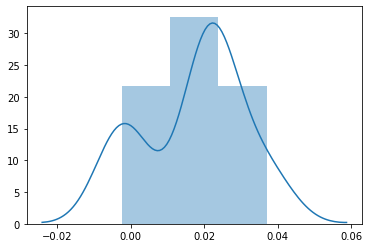

In [17]:
df=pd.concat(alldiffs,axis=1)
print(df)
df=df.loc[:,['Unnamed' not in x for x in df.columns]]
sns.distplot(df.iloc[0,:]-df.iloc[1,:])
print(np.median(df.iloc[0,:]-df.iloc[1,:]))

In [26]:

import sys
import os
fn='/home/mt/Downloads/Head-Undetermined_S0_L002_I1_001.fastq'
print(fn)
def process(lines=None):
    ks = ['name', 'sequence', 'optional', 'quality']
    return {k: v for k, v in zip(ks, lines)}

if not os.path.exists(fn):
    raise SystemError("Error: File does not exist\n")
seqs=[]
n = 4
with open(fn, 'r') as fh:
    lines = []
    for line in fh:
        lines.append(line.rstrip())
        if len(lines) == n:
            record = process(lines)
            seqs.append(record['sequence'])
            sys.stderr.write("Record: %s\n" % (str(record)))
            lines = []


/home/mt/Downloads/Head-Undetermined_S0_L002_I1_001.fastq


Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:1009:1016 1:N:0:AGCTATCA', 'sequence': 'AGCTATCA', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:1027:1016 1:N:0:ACCGTATG', 'sequence': 'ACCGTATG', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:1045:1016 1:N:0:GCTTGGCT', 'sequence': 'GCTTGGCT', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:1063:1016 1:N:0:GTCCTTCT', 'sequence': 'GTCCTTCT', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:1081:1016 1:N:0:TCGATACT', 'sequence': 'TCGATACT', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:1099:1016 1:N:0:GGGGGGGG', 'sequence': 'GGGGGGGG', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:1118:1016 1:N:0:CGAGGCTC', 'sequence': 'CGAGGCTC', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:

Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:4300:1078 1:N:0:CGAGGCTC', 'sequence': 'CGAGGCTC', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:4336:1078 1:N:0:AAGACATA', 'sequence': 'AAGACATA', 'optional': '+', 'quality': 'F,F::,F,'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:4354:1078 1:N:0:ATTTGCTA', 'sequence': 'ATTTGCTA', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:4372:1078 1:N:0:CACGAGAA', 'sequence': 'CACGAGAA', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:4390:1078 1:N:0:CTGACTGA', 'sequence': 'CTGACTGA', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:4408:1078 1:N:0:CGCCATCG', 'sequence': 'CGCCATCG', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:4444:1078 1:N:0:ACCGTATG', 'sequence': 'ACCGTATG', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:

Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:2808:1125 1:N:0:TCTTAAAG', 'sequence': 'TCTTAAAG', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:2844:1125 1:N:0:GACCCTAC', 'sequence': 'GACCCTAC', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:2862:1125 1:N:0:GTGGGTGT', 'sequence': 'GTGGGTGT', 'optional': '+', 'quality': 'F:FFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:2899:1125 1:N:0:TGACGCCC', 'sequence': 'TGACGCCC', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:2917:1125 1:N:0:TCAGGGTG', 'sequence': 'TCAGGGTG', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:2953:1125 1:N:0:GTCCTTCT', 'sequence': 'GTCCTTCT', 'optional': '+', 'quality': 'F::FFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:2971:1125 1:N:0:CGAGGCTC', 'sequence': 'CGAGGCTC', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:

Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:5222:1172 1:N:0:GCTTGGCT', 'sequence': 'GCTTGGCT', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:5240:1172 1:N:0:GTAATTGC', 'sequence': 'GTAATTGC', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:5258:1172 1:N:0:GTCCTTCT', 'sequence': 'GTCCTTCT', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:5276:1172 1:N:0:TGCTGTAA', 'sequence': 'TGCTGTAA', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:5294:1172 1:N:0:TCTATCCG', 'sequence': 'TCTATCCG', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:5312:1172 1:N:0:AGCATGGT', 'sequence': 'AGCATGGT', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:1101:5330:1172 1:N:0:CGTGCAGA', 'sequence': 'CGTGCAGA', 'optional': '+', 'quality': 'FFFFFFFF'}
Record: {'name': '@A00509:37:HKYHVDSXX:2:

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [103]:
from collections import Counter
countseqs=Counter(seqs)
observed=np.array(list(countseqs.keys()))[np.array(list(countseqs.values()))>0]


In [104]:
indexes=pd.read_csv('/home/mt/Downloads/chromium-shared-sample-indexes-plate.csv',header=None,index_col=0)
indexes=pd.concat([indexes.loc[:,x] for x in indexes.columns])

In [105]:
indexmatch=[indexes.index[indexes==x].tolist() for x in observed ]
flat_list = list(set([item for sublist in indexmatch for item in sublist]))

In [111]:
sorted(flat_list)

['SI-GA-A10',
 'SI-GA-A8',
 'SI-GA-A9',
 'SI-GA-B10',
 'SI-GA-B7',
 'SI-GA-B8',
 'SI-GA-B9',
 'SI-GA-C10',
 'SI-GA-C7',
 'SI-GA-C8',
 'SI-GA-C9',
 'SI-GA-D10',
 'SI-GA-D7',
 'SI-GA-D8',
 'SI-GA-D9',
 'SI-GA-E10',
 'SI-GA-F10',
 'SI-GA-F7',
 'SI-GA-F9',
 'SI-GA-G10',
 'SI-GA-G9',
 'SI-GA-H10',
 'SI-GA-H7',
 'SI-GA-H8',
 'SI-GA-H9']